## Problem Statement
`In the field of particle physics, accurate identification and classification of events are crucial for understanding fundamental particles and their interactions. The provided dataset contains various features derived from particle physics experiments, and the goal is to build a machine-learning model to classify events into signal (s) and background (b) categories. This classification aids in distinguishing events of interest (signal) from background noise.`

### Objective:
`The primary goal of this machine learning project is to
develop a model that can accurately predict whether a
given set of experimental features corresponds to a signal
or background event. Successful classification contributes
to the advancement of particle physics research by
automating the identification of events that may indicate
the presence of specific particles or phenomena.`

### Data Description
`EventId`: Identifier for each event in the experiment.

`DER_mass_MMC`: Derived mass of the Missing Mass Calculator. Represents the calculated mass of a system using the missing energy in the experiment.

`DER_mass_transverse_met_lep`: Indicates the mass calculated from the transverse components of missing energy and lepton.

`DER_mass_vis`: Derived mass of the visible part of the system. Represents the mass of the visible particles in the system, excluding invisible or undetected particles.

`DER_pt_h`: Transverse momentum of the Higgs boson. Indicates the momentum of the Higgs boson in the transverse plane, providing information about its motion.

`DER_deltaeta_jet_jet`: The absolute difference in pseudorapidity between the two jets. Describes the angular separation between two jets in the experiment.

`DER_mass_jet_jet`: Derived mass of the two jets.

`DER_lep_eta_centrality`: Pseudorapidity centrality of the lepton concerning jets. Pseudorapidity is a spatial coordinate used in particle physics. This feature likely indicates the centrality of the lepton (a charged particle, possibly an electron or a muon) concerning jets in the event. The centrality provides information about the lepton's position relative to the jets.

`PRI_tau_pt`: Transverse momentum of the tau. Transverse momentum is the momentum of a particle in the direction perpendicular to the beamline. This feature represents the transverse momentum of the tau particle, which is a heavy, charged particle often involved in processes like tau decays.

`PRI_tau_eta`: Pseudorapidity of the tau. Pseudorapidity is a measure of the angle of a particle's trajectory relative to the beamline. This feature indicates the pseudorapidity of the tau particle, providing information about its direction.

`PRI_tau_phi`: Azimuthal angle of the tau. Azimuthal angle defines the rotation of a particle's trajectory around the beamline. This feature represents the azimuthal angle of the tau particle, indicating its orientation in the transverse plane.

`PRI_lep_pt`: Transverse momentum of the lepton. Similar to PRI_tau_pt, this feature represents the transverse momentum of the lepton (electron or muon) in the event.

`PRI_lep_eta`: Pseudorapidity of the lepton. Similar to PRI_tau_eta, this feature indicates the pseudorapidity of the lepton, providing information about its angular position relative to the beamline.

`PRI_lep_phi`: Azimuthal angle of the lepton. Similar to PRI_tau_phi, this feature represents the azimuthal angle of the lepton, indicating its orientation in the transverse plane.

`PRI_met`: Missing transverse energy. Missing transverse energy is a crucial concept in particle physics. It represents the imbalance in transverse energy in an event, suggesting the presence of undetected particles or neutrinos.

`PRI_met_phi`: Azimuthal angle of the missing transverse energy. Similar to PRI_tau_phi and PRI_lep_phi, this feature represents the azimuthal angle of the missing transverse energy, indicating its orientation in the transverse plane.

`PRI_met_sumet`: Sum of the transverse energy of all objects in the event. This feature represents the sum of the transverse energy (energy component perpendicular to the beamline) of all objects (particles) detected in the event. It provides a measure of the overall energy flow in the transverse plane.

`PRI_jet_num`: Number of jets in the event. Indicates the count of jets observed in the event. Jets are collimated sprays of particles resulting from highenergy interactions. Knowing the number of jets is crucial for understanding the event's characteristics.

`PRI_jet_leading_pt`: Transverse momentum of the leading jet. Represents the transverse momentum of the jet with the highest transverse momentum in the event. The leading jet is the one with the most significant momentum contribution.

`PRI_jet_leading_eta`: Pseudorapidity of the leading jet. Indicates the pseudorapidity (angular position) of the leading jet, providing information about its direction in the detector.

`PRI_jet_leading_phi`: Azimuthal angle of the leading jet. Represents the azimuthal angle of the leading jet, indicating its orientation in the transverse plane.

`PRI_jet_subleading_pt`: Transverse momentum of the subleading jet. Represents the transverse momentum of the second-highest transverse momentum jet in the event (subleading jet).

`PRI_jet_subleading_eta`: Pseudorapidity of the subleading jet. Indicates the pseudorapidity of the subleading jet, providing information about its angular position in the detector.

`PRI_jet_subleading_phi`: Azimuthal angle of the subleading jet. Represents the azimuthal angle of the subleading jet, indicating its orientation in the transverse plane.

`PRI_jet_all_pt`: Sum of the transverse momentum of all jets in the event. This feature represents the sum of the transverse momentum of all jets detected in the event. It provides a measure of the overall transverse momentum contributed by all jets.

`Weight`: A weight associated with each event. The weight is a numerical value assigned to each event. It is often used as a scaling factor to account for the significance or importance of each event in the analysis. The weight may be applied during training and evaluation to adjust the contribution of each event to the model.

`Target column(Label)`: The target variable, indicating the class or label of each event (s or b). This is
the target variable where each event is labeled as either signal (s) or background (b).

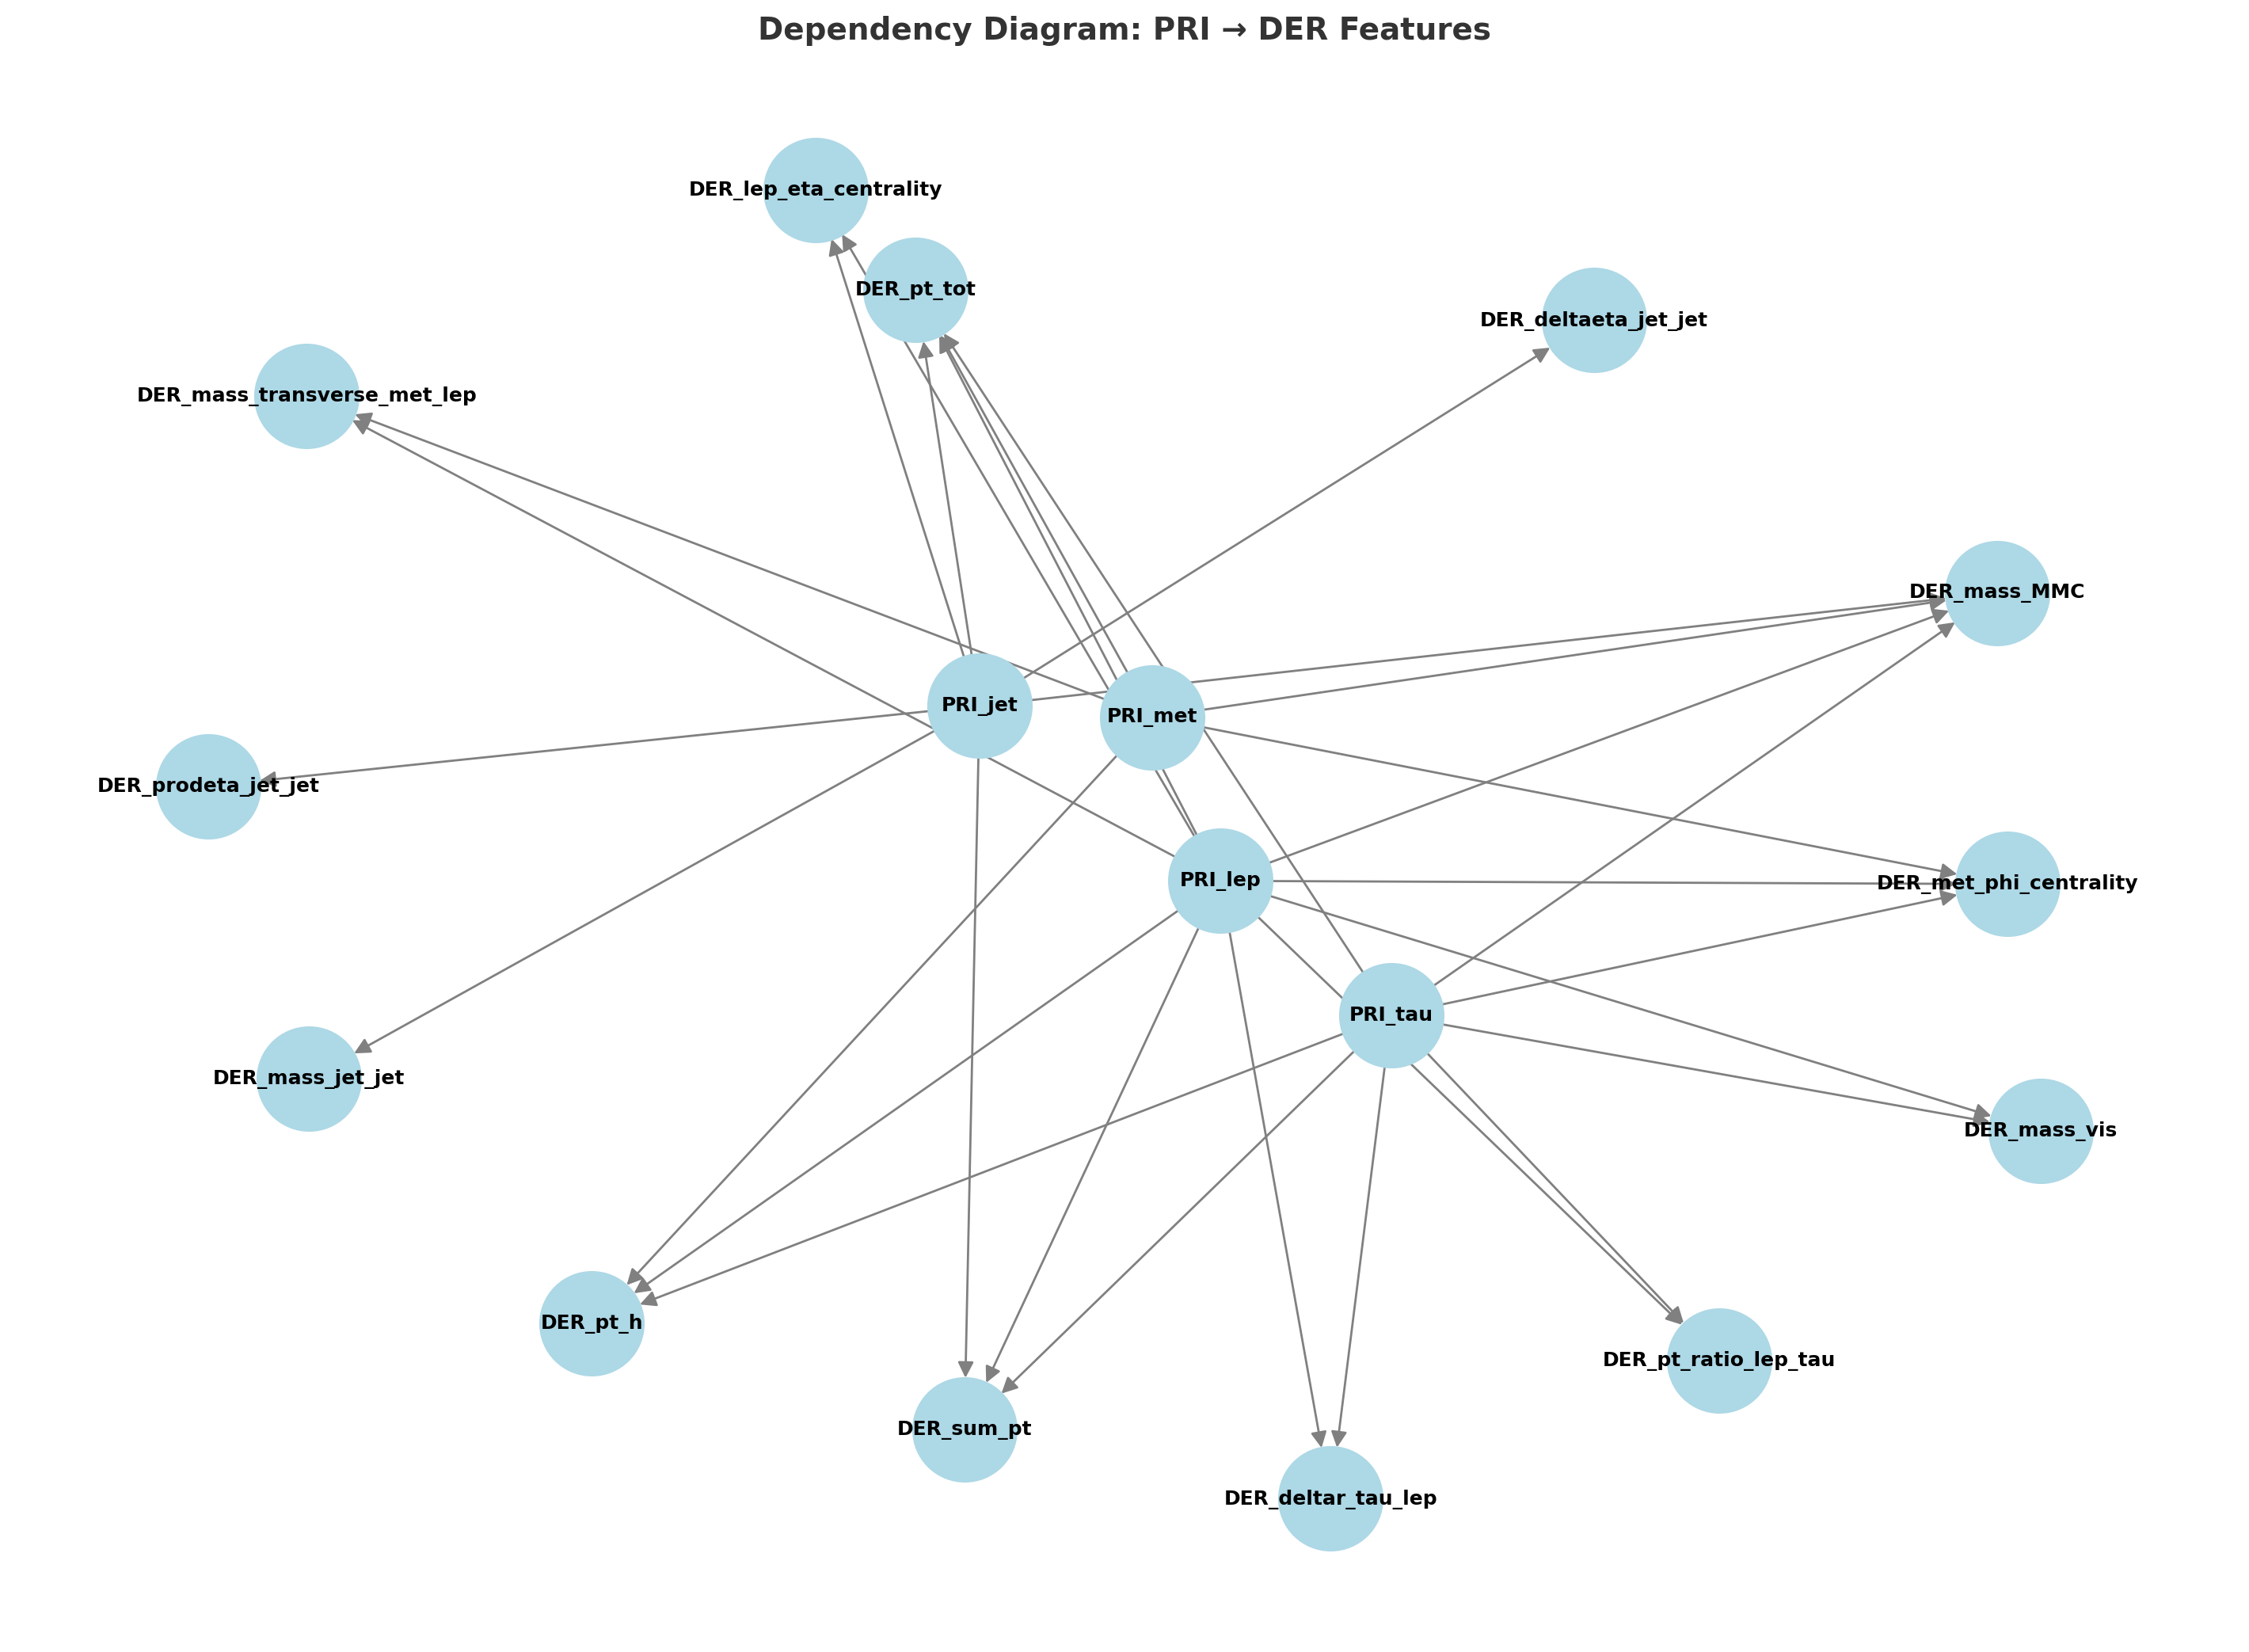

In [1]:
from IPython.display import Image
Image(filename='der.jpeg')

## Exploratory Data Analysis (EDA)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data_science_dataset.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [7]:
df.sample(8)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
62967,162967,-999.000,70.213,71.644,1.603,-999.000,-999.000,-999.000,2.530,1.603,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,5.609663,b
33876,133876,88.478,40.760,61.316,42.725,-999.000,-999.000,-999.000,2.343,1.511,...,1,42.271,1.306,-0.570,-999.000,-999.000,-999.000,42.271,1.681611,b
178823,278823,278.663,86.163,195.670,54.488,-999.000,-999.000,-999.000,3.089,11.405,...,1,53.856,0.552,2.032,-999.000,-999.000,-999.000,53.856,1.903377,b
219506,319506,-999.000,91.403,86.390,126.856,1.941,143.420,0.612,1.614,45.819,...,2,80.351,-2.217,1.852,44.735,-0.276,1.296,125.087,0.744056,b
175088,275088,184.272,93.256,102.561,56.364,-999.000,-999.000,-999.000,3.107,25.499,...,1,40.823,-1.662,-0.190,-999.000,-999.000,-999.000,40.823,2.301918,b
60468,160468,87.975,131.348,80.397,124.250,0.124,97.169,0.383,0.990,181.209,...,3,174.540,-0.560,-1.972,135.348,-0.684,-2.528,554.617,0.001502,s
211482,311482,70.732,18.120,48.752,150.571,0.857,81.254,-0.135,0.973,49.037,...,2,82.633,-0.208,-0.106,37.073,0.649,1.081,119.706,0.789461,b
226750,326750,140.947,3.676,89.642,2.645,-999.000,-999.000,-999.000,3.196,2.645,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0.018636,s


In [8]:
df.shape

(250000, 33)

In [9]:
# df = df.replace(-999, np.nan)
df = df.replace(-999, 0)
# to handle missing values

In [10]:
df.sample(6)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
60603,160603,0.000,87.523,45.983,29.286,0.000,0.000,0.000,1.611,29.286,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.764240,b
73330,173330,197.096,65.044,126.596,0.849,0.000,0.000,0.000,3.894,0.849,...,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.918246,b
139443,239443,92.905,12.783,62.370,32.692,0.000,0.000,0.000,2.498,7.082,...,1,38.210,-0.780,-1.129,0.000,0.000,0.000,38.210,1.681611,b
234022,334022,107.410,64.029,72.061,48.519,0.000,0.000,0.000,2.975,0.545,...,1,48.811,-1.325,-0.665,0.000,0.000,0.000,48.811,1.681611,b
28375,128375,86.108,12.009,56.924,19.579,0.000,0.000,0.000,3.104,33.782,...,1,52.653,1.301,-2.866,0.000,0.000,0.000,52.653,0.309795,b
221910,321910,120.446,44.904,56.143,101.062,5.285,857.245,-6.942,2.173,58.347,...,3,76.937,-2.848,0.482,48.392,2.438,-1.035,193.132,1.009148,b


In [11]:
df.isnull().sum()/len(df)*100

EventId                        0.0
DER_mass_MMC                   0.0
DER_mass_transverse_met_lep    0.0
DER_mass_vis                   0.0
DER_pt_h                       0.0
DER_deltaeta_jet_jet           0.0
DER_mass_jet_jet               0.0
DER_prodeta_jet_jet            0.0
DER_deltar_tau_lep             0.0
DER_pt_tot                     0.0
DER_sum_pt                     0.0
DER_pt_ratio_lep_tau           0.0
DER_met_phi_centrality         0.0
DER_lep_eta_centrality         0.0
PRI_tau_pt                     0.0
PRI_tau_eta                    0.0
PRI_tau_phi                    0.0
PRI_lep_pt                     0.0
PRI_lep_eta                    0.0
PRI_lep_phi                    0.0
PRI_met                        0.0
PRI_met_phi                    0.0
PRI_met_sumet                  0.0
PRI_jet_num                    0.0
PRI_jet_leading_pt             0.0
PRI_jet_leading_eta            0.0
PRI_jet_leading_phi            0.0
PRI_jet_subleading_pt          0.0
PRI_jet_subleading_e

In [12]:
df["has_leading_jet"] = (df["PRI_jet_num"] >= 1).astype(int)
df["has_subleading_jet"] = (df["PRI_jet_num"] >= 2).astype(int)
df["mmc_failed"] = df["DER_mass_MMC"].isna().astype(int)
df.sample(7)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,has_leading_jet,has_subleading_jet,mmc_failed
137357,237357,0.000,56.917,55.917,49.891,0.0,0.0,0.0,1.592,21.170,...,-2.353,0.0,0.0,0.0,42.493,1.733887,b,1,0,0
42250,142250,0.000,93.706,95.675,2.745,0.0,0.0,0.0,2.231,2.745,...,0.000,0.0,0.0,0.0,0.000,4.424354,b,0,0,0
35566,135566,119.952,65.091,93.698,8.977,0.0,0.0,0.0,2.740,8.977,...,0.000,0.0,0.0,0.0,0.000,4.904944,b,0,0,0
54099,154099,154.093,73.041,100.546,0.846,0.0,0.0,0.0,2.999,0.846,...,0.000,0.0,0.0,0.0,0.000,4.580853,b,0,0,0
177840,277840,80.730,15.767,55.374,45.114,0.0,0.0,0.0,2.346,3.381,...,-0.840,0.0,0.0,0.0,48.483,1.681611,b,1,0,0
56134,156134,222.903,86.930,172.971,0.392,0.0,0.0,0.0,3.102,0.392,...,0.000,0.0,0.0,0.0,0.000,5.040880,b,0,0,0
185157,285157,100.765,26.783,71.727,6.264,0.0,0.0,0.0,3.266,6.264,...,0.000,0.0,0.0,0.0,0.000,0.018636,s,0,0,0


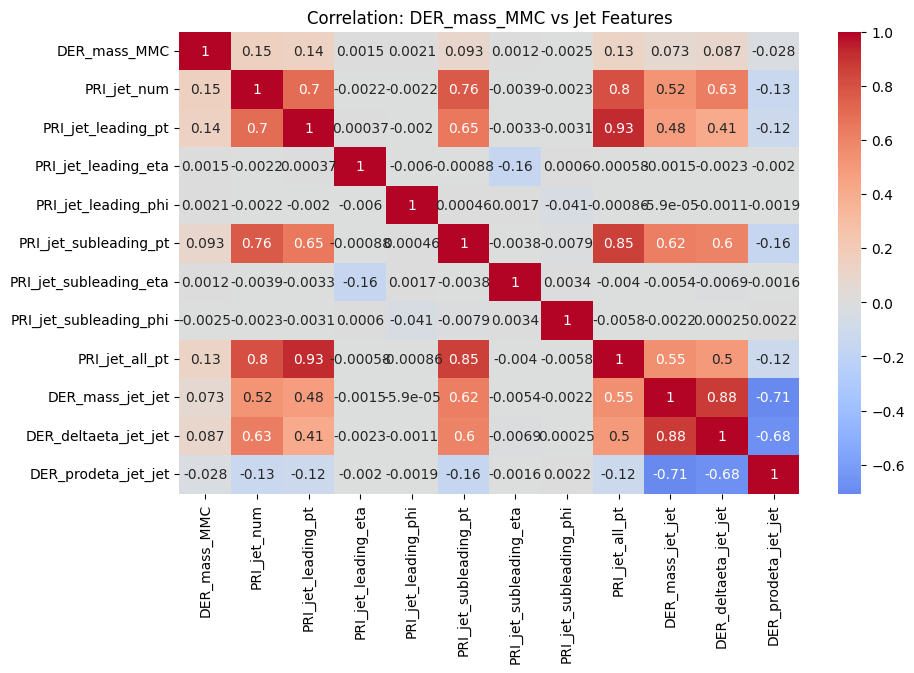

In [13]:
# 4. Correlation heatmap (DER_mass_MMC vs jet-related features)
jet_features = ["PRI_jet_num", "PRI_jet_leading_pt", "PRI_jet_leading_eta", "PRI_jet_leading_phi",
                "PRI_jet_subleading_pt", "PRI_jet_subleading_eta", "PRI_jet_subleading_phi",
                "PRI_jet_all_pt", "DER_mass_jet_jet", "DER_deltaeta_jet_jet", "DER_prodeta_jet_jet"]

corr_matrix = df[["DER_mass_MMC"] + jet_features].replace(-999, np.nan).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation: DER_mass_MMC vs Jet Features")
plt.show()

<Axes: xlabel='Label', ylabel='count'>

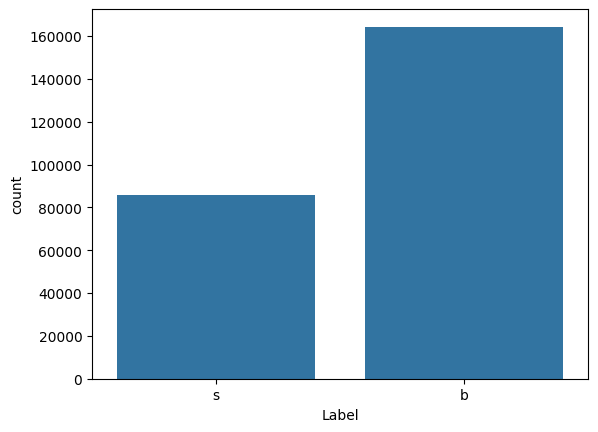

In [14]:
sns.countplot(x=df['Label'], fill=True,legend=True,)

In [15]:
df['Label'].value_counts()/len(df)*100

Label
b    65.7332
s    34.2668
Name: count, dtype: float64

In [16]:
df.shape

(250000, 36)

In [17]:
x = df.drop(columns='Label')  
y = df['Label']

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yencoded = le.fit_transform(y)

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest = train_test_split(x, yencoded, test_size=0.20, random_state=45, stratify=yencoded)

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
xtrain_res, ytrain_res = smote.fit_resample(xtrain, ytrain)

<Axes: ylabel='count'>

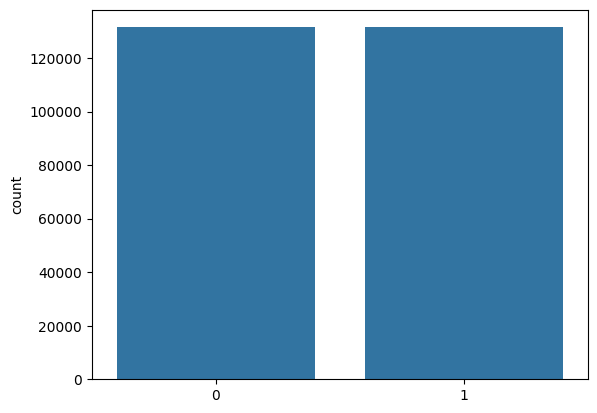

In [24]:
sns.countplot(x=ytrain_res, fill=True,legend=True)

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [28]:
scale_pos_weight = int(df['Label'].value_counts()[0]/df['Label'].value_counts()[1])
print(scale_pos_weight)

1


In [29]:
model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

model.fit(xtrain_res, ytrain_res)

y_pred = model.predict(xtest)
y_proba = model.predict_proba(xtest)[:, 1]

print(classification_report(ytest, y_pred))
print("ROC AUC:", roc_auc_score(ytest, y_proba))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32867
           1       1.00      1.00      1.00     17133

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

ROC AUC: 1.0


In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, xtrain_res, ytrain_res, scoring='roc_auc', cv=5)
print("Cross-validated ROC AUC scores:", scores)
print("Mean AUC:", scores.mean())


Cross-validated ROC AUC scores: [1. 1. 1. 1. 1.]
Mean AUC: 1.0


In [35]:
from pycaret.classification import 

ImportError: cannot import name '_print_elapsed_time' from 'sklearn.utils' (/home/doodh/Downloads/venvs/pycaret/lib/python3.11/site-packages/sklearn/utils/__init__.py)